<a href="https://colab.research.google.com/github/LOKESH2343/AIML-25_B16/blob/main/Lab-Exam-1079.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
           'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data = pd.read_csv(url, header=None, names=columns)
data = data[data['Class'].isin([1, 2])]
X = data[['Alcohol', 'Malic acid']].values
y = data['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [3]:
y_pred = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.00
Confusion Matrix:
[[20  0]
 [ 0 19]]


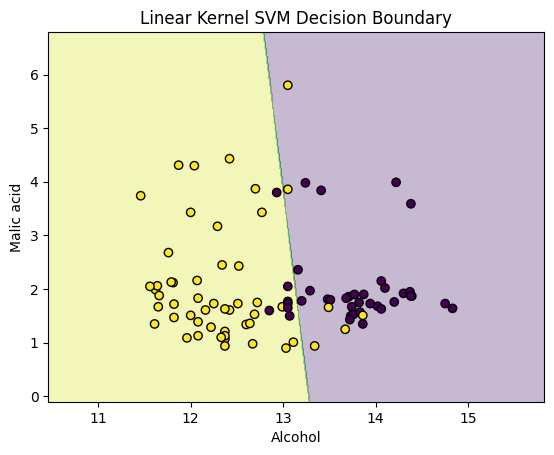

In [4]:
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic acid')
    plt.title(title)
    plt.show()
plot_decision_boundary(svm_linear, X_train, y_train, 'Linear Kernel SVM Decision Boundary')

RBF Kernel SVM Accuracy: 1.00
RBF Kernel SVM Confusion Matrix:
[[20  0]
 [ 0 19]]


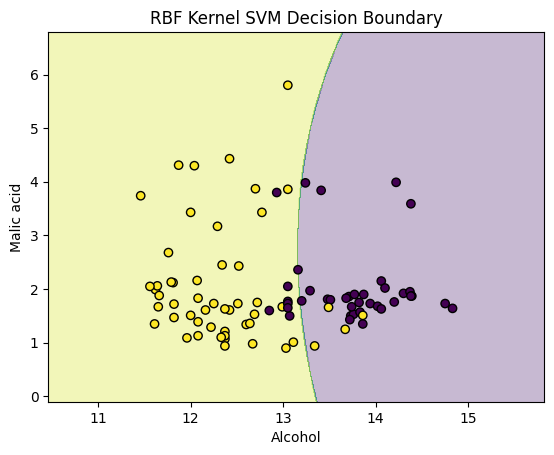

In [5]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'RBF Kernel SVM Accuracy: {accuracy_rbf:.2f}')
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
print('RBF Kernel SVM Confusion Matrix:')
print(conf_matrix_rbf)
plot_decision_boundary(svm_rbf, X_train, y_train, 'RBF Kernel SVM Decision Boundary')

RBF Kernel SVM with Feature Scaling Accuracy: 1.00
RBF Kernel SVM with Feature Scaling Confusion Matrix:
[[20  0]
 [ 0 19]]


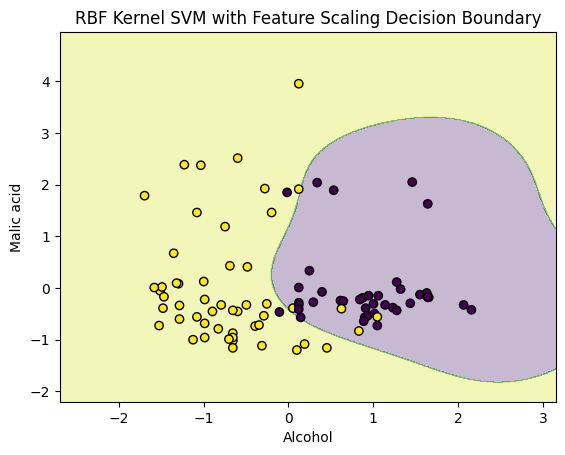

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_rbf_scaled = SVC(kernel='rbf', random_state=42)
svm_rbf_scaled.fit(X_train_scaled, y_train)
y_pred_rbf_scaled = svm_rbf_scaled.predict(X_test_scaled)
accuracy_rbf_scaled = accuracy_score(y_test, y_pred_rbf_scaled)
print(f'RBF Kernel SVM with Feature Scaling Accuracy: {accuracy_rbf_scaled:.2f}')
conf_matrix_rbf_scaled = confusion_matrix(y_test, y_pred_rbf_scaled)
print('RBF Kernel SVM with Feature Scaling Confusion Matrix:')
print(conf_matrix_rbf_scaled)
plot_decision_boundary(svm_rbf_scaled, X_train_scaled, y_train, 'RBF Kernel SVM with Feature Scaling Decision Boundary')